# Ciencia de datos aplicada (ITBA): Modelo de segundo entregable

**Equipo:** Desiree Melisa Limachi, Felipe Mendiondo, German Lorenzani

**Nombre del proyecto**:
Sistema de pricing dinámico para ATUA

### 🧾 1. Importación y carga de librerías

('Reservas.csv', <http.client.HTTPMessage at 0x2dd3dffc1c0>)

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker
import math


### 🧾 2. Carga de datos

Con este código cargamos el archivo de reservas de Atua y limpiamos para enfocarnos solo en la información relevante para el análisis. Se eliminan varias columnas que no aportaban valor, como datos personales de los clientes, identificadores únicos y observaciones internas, porque por un lado no eran relevantes para nuestro analisis y por otro al ser algunos datos sensibles como la informacion de los clientes no parecio mejor, por seguridad, trabajar sin ellos.


In [55]:
df = pd.read_csv('dataset/Reservas.csv', sep=';')

# Eliminamos columnas no necesarias
df_filtered = df.drop(columns=['Email', 'Dni', 'Telefono', 'uuid', 'Cliente', 'Proveedor de carro', 
                               'Patente', 'Anifitrion', 'Celular', 'Iva', 'Observaciones', 'Pago Anfitrion', 
                               'Condicion', 'id', 'Entrega Aeropuerto', 'Devolucion Aeropuerto'])

df_filtered.head()

,Fecha de creacion,Estado,Ubicacion,Origen,Modelo,Nuevo Precio,Precio de la publicacion,Precio de la reserva,Gastos administrativo,Seguro base,...,Seguro Premium,Precio final,Pago seña,Pendiente Por Cobrar,Check-in,Check-out,Dias de Alquiler,Pago de garantia,Monto de la garantia,Devolución Garantia
0,2022-09-14 15:56:05.325406,CANCELADA,"Costa Rica 3966, ADB, Buenos Aires, Argentina",NaN,Sandero,ARS 49.000,ARS 7.633,ARS 22.900,ARS 1.145,ARS 5.200,...,ARS 0,ARS 29.485,ARS 0,ARS 0,16/9/22 0:00,19/9/22 0:00,3,NO,ARS 0,NO
1,2022-09-15 09:02:19.699192,CANCELADA,"Costa Rica 3966, ADB, Buenos Aires, Argentina",NaN,Sandero,ARS 49.000,ARS 7.533,ARS 22.600,ARS 1.130,ARS 5.200,...,ARS 0,ARS 29.167,ARS 0,ARS 0,17/9/22 0:00,20/9/22 0:00,3,NO,ARS 0,NO
2,2022-09-15 16:34:28.967242,CANCELADA,"Costa Rica 3966, ADB, Buenos Aires, Argentina",NaN,Polo,ARS 25.000,ARS 50,ARS 150,ARS 8,ARS 3.900,...,ARS 0,ARS 4.059,ARS 0,ARS 0,17/9/22 0:00,20/9/22 0:00,3,NO,ARS 0,NO
3,2022-09-16 09:47:21.170276,COMPLETADA,"Costa Rica 3966, ADB, Buenos Aires, Argentina",NaN,Polo,ARS 25.000,ARS 50,ARS 50,ARS 2,ARS 1.300,...,ARS 0,ARS 1.353,ARS 0,ARS 0,18/9/22 0:00,19/9/22 0:00,1,SI,ARS 0,NO
4,2022-09-16 12:47:25.829897,CANCELADA,"Costa Rica 3966, ADB, Buenos Aires, Argentina",NaN,Sandero,ARS 49.000,ARS 5.500,ARS 5.500,ARS 275,ARS 1.300,...,ARS 0,ARS 7.133,ARS 0,ARS 0,19/9/22 0:00,20/9/22 0:00,1,NO,ARS 0,NO


El presente análisis se basa en un dataset provisto por ATUA, una empresa argentina dedicada al alquiler de vehículos. El conjunto contiene 5.234  reservas de autos realizadas durante el año 2024 y 2025. Cada fila representa una reserva individual con información relacionada a su creación, duración, canal de origen, costos, estado final y ubicación geográfica.

Las reservas se encuentran en diferentes estados como cancelada, completada, check-in y check-out. También se incluye información sobre pagos realizados, montos pendientes, señas y garantías, lo que permite estudiar el comportamiento de los clientes y el funcionamiento operativo de la empresa.

El dataset cuenta con 20 variables:

Fecha de creación: fecha y hora en que se registró la reserva

Estado: estado final de la reserva

Ubicación: dirección específica de gestión de la reserva

Provincia: provincia donde se realizó la operación

Origen: canal digital de la reserva (web, app, web new)

Modelo: modelo del vehículo alquilado

Nuevo precio: valor actualizado del vehículo

Precio de la publicación: valor publicado en el canal digital

Precio de la reserva: precio acordado para la reserva

Gastos administrativos: costos asociados a la gestión

Seguro base: costo base del seguro del vehículo

Precio final: total que el cliente debía pagar

Pago seña: adelanto entregado por el cliente

Pendiente por cobrar: saldo pendiente de pago

Check-in: inicio del período de alquiler

Check-out: finalización del alquiler

Días de alquiler: duración total del servicio

Pago de garantía: indica si se abonó garantía

Monto de la garantía: valor entregado como garantía

Devolución garantía: indica si se devolvió el importe


Para el análisis se utilizarán principalmente las variables modelo, provincia y precio de la reserva para estudiar el comportamiento de los precios según la demanda y la ubicación geográfica. Además, se considerarán variables como estado, seguro base y gastos administrativos para evaluar el impacto económico de las cancelaciones y explorar aspectos vinculados a la satisfacción del cliente y la eficiencia operativa. Estas variables permitirán abordar tanto la dinámica comercial como la experiencia del usuario dentro del proceso de reservas.




### 🧪 4. Transformaciones realizadas
En esta parte del trabajo, lo que hicimos fue normalizar y limpiar columnas clave del dataset que notamos que tenian inconsistencias para dejarlo mas ordenado y facilitar el resto del analisis.
Primero trabajamos con la columna de fechas, convirtiéndola al formato datetime y filtrando únicamente las reservas creadas a partir del 1 de diciembre de 2024 ya que inicialmente la empresa tenia un modelo de alquileres de autos tradicionales en aeropuertos, a diferencia de ahora que no tiene autos propios y funciona como un intermediario entre las  personas que quieren alquilar su auto y personas que necesitan alquilar un auto, y muchos datos estaban desactualizados y no podian ser usados para nuestro analisis.
Luego trabajamos en normalizar la ubicacion. Extraímos la provincia desde la columna “Ubicación”, que venía con información mezclada, y unificamos los nombres de provincias que aparecían con distintas variantes, por ejemplo, “CABA”, “Capital Federal”, “Ciudad Autónoma de Buenos Aires” y barrios como "Caballito" fueron reemplazadas por “Buenos Aires”.
Paso siguiente, normalizamos las columnas de tipo monetario como precio, precio final pago seña, etc, que originalmente contenían símbolos y separadores como puntos y comas. Eliminamos estos caracteres y convertimos todos los valores a tipo numérico para poder analizarlos correctamente.
Finalmente, filtramos aquellas reservas que tuvieran un precio final válido y mayor a cero, descartando entradas incompletas o erróneas. Una vez hecho todo esto, exportamos el nuevo dataset limpio como Reservas_limpio.csv, que es el archivo que usamos como base para los análisis posteriores.

In [ ]:
df = pd.read_csv('dataset/Reservas.csv', sep=';')

# Normalización de fechas
df_filtered['Fecha de creacion'] = pd.to_datetime(df_filtered['Fecha de creacion'], errors='coerce')
fecha_limite = pd.to_datetime('2024-12-01')
df_filtered = df_filtered[df_filtered['Fecha de creacion'] >= fecha_limite]


#Normalización de Ubicación
ciudades_a_provincias = {
    'San Miguel de Tucumán': 'Tucumán',
    'Córdoba': 'Córdoba',
    'Rosario': 'Santa Fe',
    'Mendoza': 'Mendoza',
    'Capital Federal': 'Buenos Aires',
    'CABA': 'Buenos Aires',
    'Neuquén': 'Neuquén',
    'Salta': 'Salta',
    'Campana' : 'Buenos Aires',
    'Córdoba Capital' : 'Córdoba',
    'Godoy Cruz': 'Mendoza',
    'Villa Urquiza CABA': 'Buenos Aires',
    'Matienzo 1431': 'Mendoza',
    'Rio Negro' : 'Río Negro',
    'San Rafael': 'Mendoza',
    'Capital' : 'Buenos Aires',
    'Monteros': 'Tucumán'
}
provincias_validas = {
    'Buenos Aires', 'CABA', 'Catamarca', 'Chaco', 'Chubut', 'Córdoba', 'Corrientes',
    'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja', 'Mendoza', 'Misiones',
    'Neuquén', 'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
    'Santa Fe', 'Santiago del Estero', 'Tierra del Fuego', 'Tucumán'
}

def extraer_provincia(ubicacion):
    if pd.isna(ubicacion):
        return np.nan
    partes = ubicacion.split(',')
    if len(partes) >= 2:
        posible_prov = partes[-2].strip()
    else:
        posible_prov = ubicacion.strip()

    posible_prov = posible_prov.replace('Province', '').strip().lower()

    reemplazos = {
        'capital federal': 'buenos aires',
        'ciudad autónoma de buenos aires': 'buenos aires',
        'caba': 'buenos aires',
        'cordoba capital': 'córdoba',
        'san miguel de tucumán': 'tucumán',
        'caballito': 'buenos aires',
        'córdoba capital': 'córdoba',
        'aeropuerto': 'rio negro'
    }

    posible_prov = reemplazos.get(posible_prov, posible_prov)

    # Buscar en el diccionario ciudades_a_provincias
    provincia = ciudades_a_provincias.get(posible_prov.title(), posible_prov.title())

    # Verificar si es una provincia válida
    if provincia in provincias_validas:
        return provincia
    else:
        return np.nan
    
df_filtered['Provincia'] = df_filtered['Ubicacion'].apply(extraer_provincia)

#Normalización de Precios
columnas_monetarias = [
    'Nuevo Precio', 'Precio de la publicacion', 'Precio de la reserva',
    'Gastos administrativo', 'Seguro base', 'Seguro Contra Terceros',
    'Seguro Premium', 'Precio final', 'Pago seña',
    'Pendiente Por Cobrar', 'Monto de la garantia'
]

for col in columnas_monetarias:
    df_filtered[col] = (
        df_filtered[col]
        .astype(str)
        .str.replace('ARS', '', regex=False)
        .str.replace('.', '', regex=False)
        .str.replace(',', '', regex=False)
        .str.strip()
        .replace('', '0') 
        .astype(float)
        .astype(int)
    )

df_filtered = df_filtered[df_filtered['Origen'].str.lower() != 'rentlyapp']



df_filtered = df_filtered[
    (df_filtered['Precio final'].notna()) & 
    (df_filtered['Precio final'] > 0)
]


## Normalización de modelos
marcas = [
    'Peugeot', 'Volkswagen', 'Chevrolet', 'Fiat', 'Renault', 'Ford', 'Toyota', 'Nissan',
    'Honda', 'Citroen', 'Hyundai', 'Kia', 'Mercedes', 'BMW', 'Audi', 'Jeep'
]

def normalizar_marca(modelo):
    if pd.isna(modelo):
        return 'Otro'
    
    modelo_lower = modelo.lower()
    
    for marca in marcas:
        if marca.lower() in modelo_lower:
            return marca
    
    if any(p in modelo_lower for p in ['208', '207', '308', '301', '2008', '408']):
        return 'Peugeot'
    if any(p in modelo_lower for p in ['gol', 'up', 'vento', 'fox', 'voyage', 'trend', 'polo', 'passat']):
        return 'Volkswagen'
    if any(p in modelo_lower for p in ['prisma', 'onix', 'cruze', 'corsa', 'spin', 'sonic', 'agile']):
        return 'Chevrolet'
    if any(p in modelo_lower for p in ['uno', 'mobi', 'siena', 'palio', 'cronos', 'argo', 'toro']):
        return 'Fiat'
    if any(p in modelo_lower for p in ['stepway', 'logan', 'sandero', 'kwid', 'clio', 'duster', 'captur']):
        return 'Renault'
    if any(p in modelo_lower for p in ['fiesta', 'focus', 'ka', 'ranger', 'eco']):
        return 'Ford'
    if any(p in modelo_lower for p in ['corolla', 'etios', 'hilux', 'yaris', 'sw4']):
        return 'Toyota'
    if any(p in modelo_lower for p in ['versa', 'march', 'sentra', 'kicks', 'frontier']):
        return 'Nissan'
    if any(p in modelo_lower for p in ['glk', 'sprinter', 'class']):
        return 'Mercedes'
    if any(p in modelo_lower for p in ['c3']):
        return 'Citroen'
    if any(p in modelo_lower for p in ['renegade']):
        return 'Jeep'
    if any(p in modelo_lower for p in ['tucson', 'creta']):
        return 'Hyundai'
    if any(p in modelo_lower for p in ['qq']):
        return 'Chery'


df_filtered['Marca'] = df_filtered['Modelo'].apply(normalizar_marca)

df_filtered.to_csv('dataset/Reservas_limpio.csv', sep=';', index=False)

df_filtered.head()

,Fecha de creacion,Estado,Ubicacion,Origen,Modelo,Nuevo Precio,Precio de la publicacion,Precio de la reserva,Gastos administrativo,Seguro base,...,Pago seña,Pendiente Por Cobrar,Check-in,Check-out,Dias de Alquiler,Pago de garantia,Monto de la garantia,Devolución Garantia,Provincia,Marca_normalizada
3351,2024-12-01 09:00:51.878981,CANCELADA,"Córdoba, Argentina",APP,Etios,45000,39000,78000,6630,11000,...,0,0,20/12/24 9:00,22/12/24 9:00,2,NO,400000,NO,Córdoba,Toyota
3352,2024-12-01 11:55:20.519032,CANCELADA,"Gobernador Duval, Santa Rosa, La Pampa Provinc...",WEB,Ranger,70000,70000,280000,23800,22000,...,0,0,30/12/24 10:00,2/1/25 12:00,4,NO,400000,NO,La Pampa,Ford
3353,2024-12-01 12:12:10.362506,CANCELADA,"Gobernador Duval, Santa Rosa, La Pampa Provinc...",WEB,Ranger,70000,72667,218000,18530,16500,...,0,0,1/12/24 12:11,4/12/24 12:11,3,NO,400000,NO,La Pampa,Ford
3354,2024-12-01 12:41:15.321837,CANCELADA,"Celedonio Gutiérrez 1287, San Miguel de Tucumá...",WEB,Kangoo,62000,62000,310000,26350,27500,...,0,0,10/1/25 11:00,14/1/25 16:30,5,NO,400000,NO,Tucumán,Ford
3355,2024-12-01 14:45:10.681398,CANCELADA,"Vicente López 2305, Buenos Aires, Argentina",APP,Focus,65000,60000,60000,5100,5500,...,0,0,11/12/24 19:00,12/12/24 19:00,1,NO,400000,NO,Buenos Aires,Ford


### 🔍 5. Análisis exploratorio de datos (EDA)

In [57]:
# Información general
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1881 entries, 3351 to 5233
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Fecha de creacion         1881 non-null   datetime64[ns]
 1   Estado                    1881 non-null   object        
 2   Ubicacion                 1881 non-null   object        
 3   Origen                    1449 non-null   object        
 4   Modelo                    1881 non-null   object        
 5   Nuevo Precio              1881 non-null   int32         
 6   Precio de la publicacion  1881 non-null   int32         
 7   Precio de la reserva      1881 non-null   int32         
 8   Gastos administrativo     1881 non-null   int32         
 9   Seguro base               1881 non-null   int32         
 10  Seguro Contra Terceros    1881 non-null   int32         
 11  Seguro Premium            1881 non-null   int32         
 12  Precio final          

In [58]:
# Información general
df_filtered.describe()

,Fecha de creacion,Nuevo Precio,Precio de la publicacion,Precio de la reserva,Gastos administrativo,Seguro base,Seguro Contra Terceros,Seguro Premium,Precio final,Pago seña,Pendiente Por Cobrar,Dias de Alquiler,Monto de la garantia
count,1881,1881.000000,1881.000000,1.881000e+03,1881.000000,1881.000000,1881.000000,1881.000000,1.881000e+03,1881.000000,1881.000000,1881.000000,1881.000000
mean,2025-01-17 01:27:28.176063744,62546.239766,58242.104732,2.790194e+05,26607.631579,26298.245614,2347.687400,13536.648060,3.491033e+05,6134.538543,3752.181287,4.790005,432535.885167
min,2024-12-01 09:00:51.878981,25000.000000,10.000000,1.000000e+01,0.000000,0.000000,0.000000,0.000000,5.511000e+03,0.000000,0.000000,1.000000,0.000000
25%,2024-12-21 16:33:52.202398976,50000.000000,50000.000000,1.400000e+05,12750.000000,16500.000000,0.000000,0.000000,1.779750e+05,0.000000,0.000000,3.000000,400000.000000
50%,2025-01-05 14:18:59.887024128,60000.000000,55000.000000,2.200000e+05,21250.000000,22000.000000,0.000000,0.000000,2.783750e+05,0.000000,0.000000,4.000000,400000.000000
75%,2025-02-09 13:08:24.802938880,70000.000000,65000.000000,3.500000e+05,32725.000000,33000.000000,0.000000,23000.000000,4.344000e+05,0.000000,0.000000,6.000000,500000.000000
max,2025-04-28 11:08:05.013943,195000.000000,195000.000000,2.275000e+06,261625.000000,187000.000000,128000.000000,200600.000000,2.663125e+06,738100.000000,921420.000000,34.000000,700000.000000
std,NaN,20129.314445,18012.894762,2.291953e+05,22629.771963,20117.793863,10428.049134,24298.805147,2.772713e+05,43034.844291,39736.011250,3.655661,56157.092671


In [59]:
# Valores faltantes
df_filtered.isnull().sum()

Fecha de creacion             0
Estado                        0
Ubicacion                     0
Origen                      432
Modelo                        0
Nuevo Precio                  0
Precio de la publicacion      0
Precio de la reserva          0
Gastos administrativo         0
Seguro base                   0
Seguro Contra Terceros        0
Seguro Premium                0
Precio final                  0
Pago seña                     0
Pendiente Por Cobrar          0
Check-in                      0
Check-out                     0
Dias de Alquiler              0
Pago de garantia              0
Monto de la garantia          0
Devolución Garantia           0
Provincia                    49
Marca_normalizada            54
dtype: int64

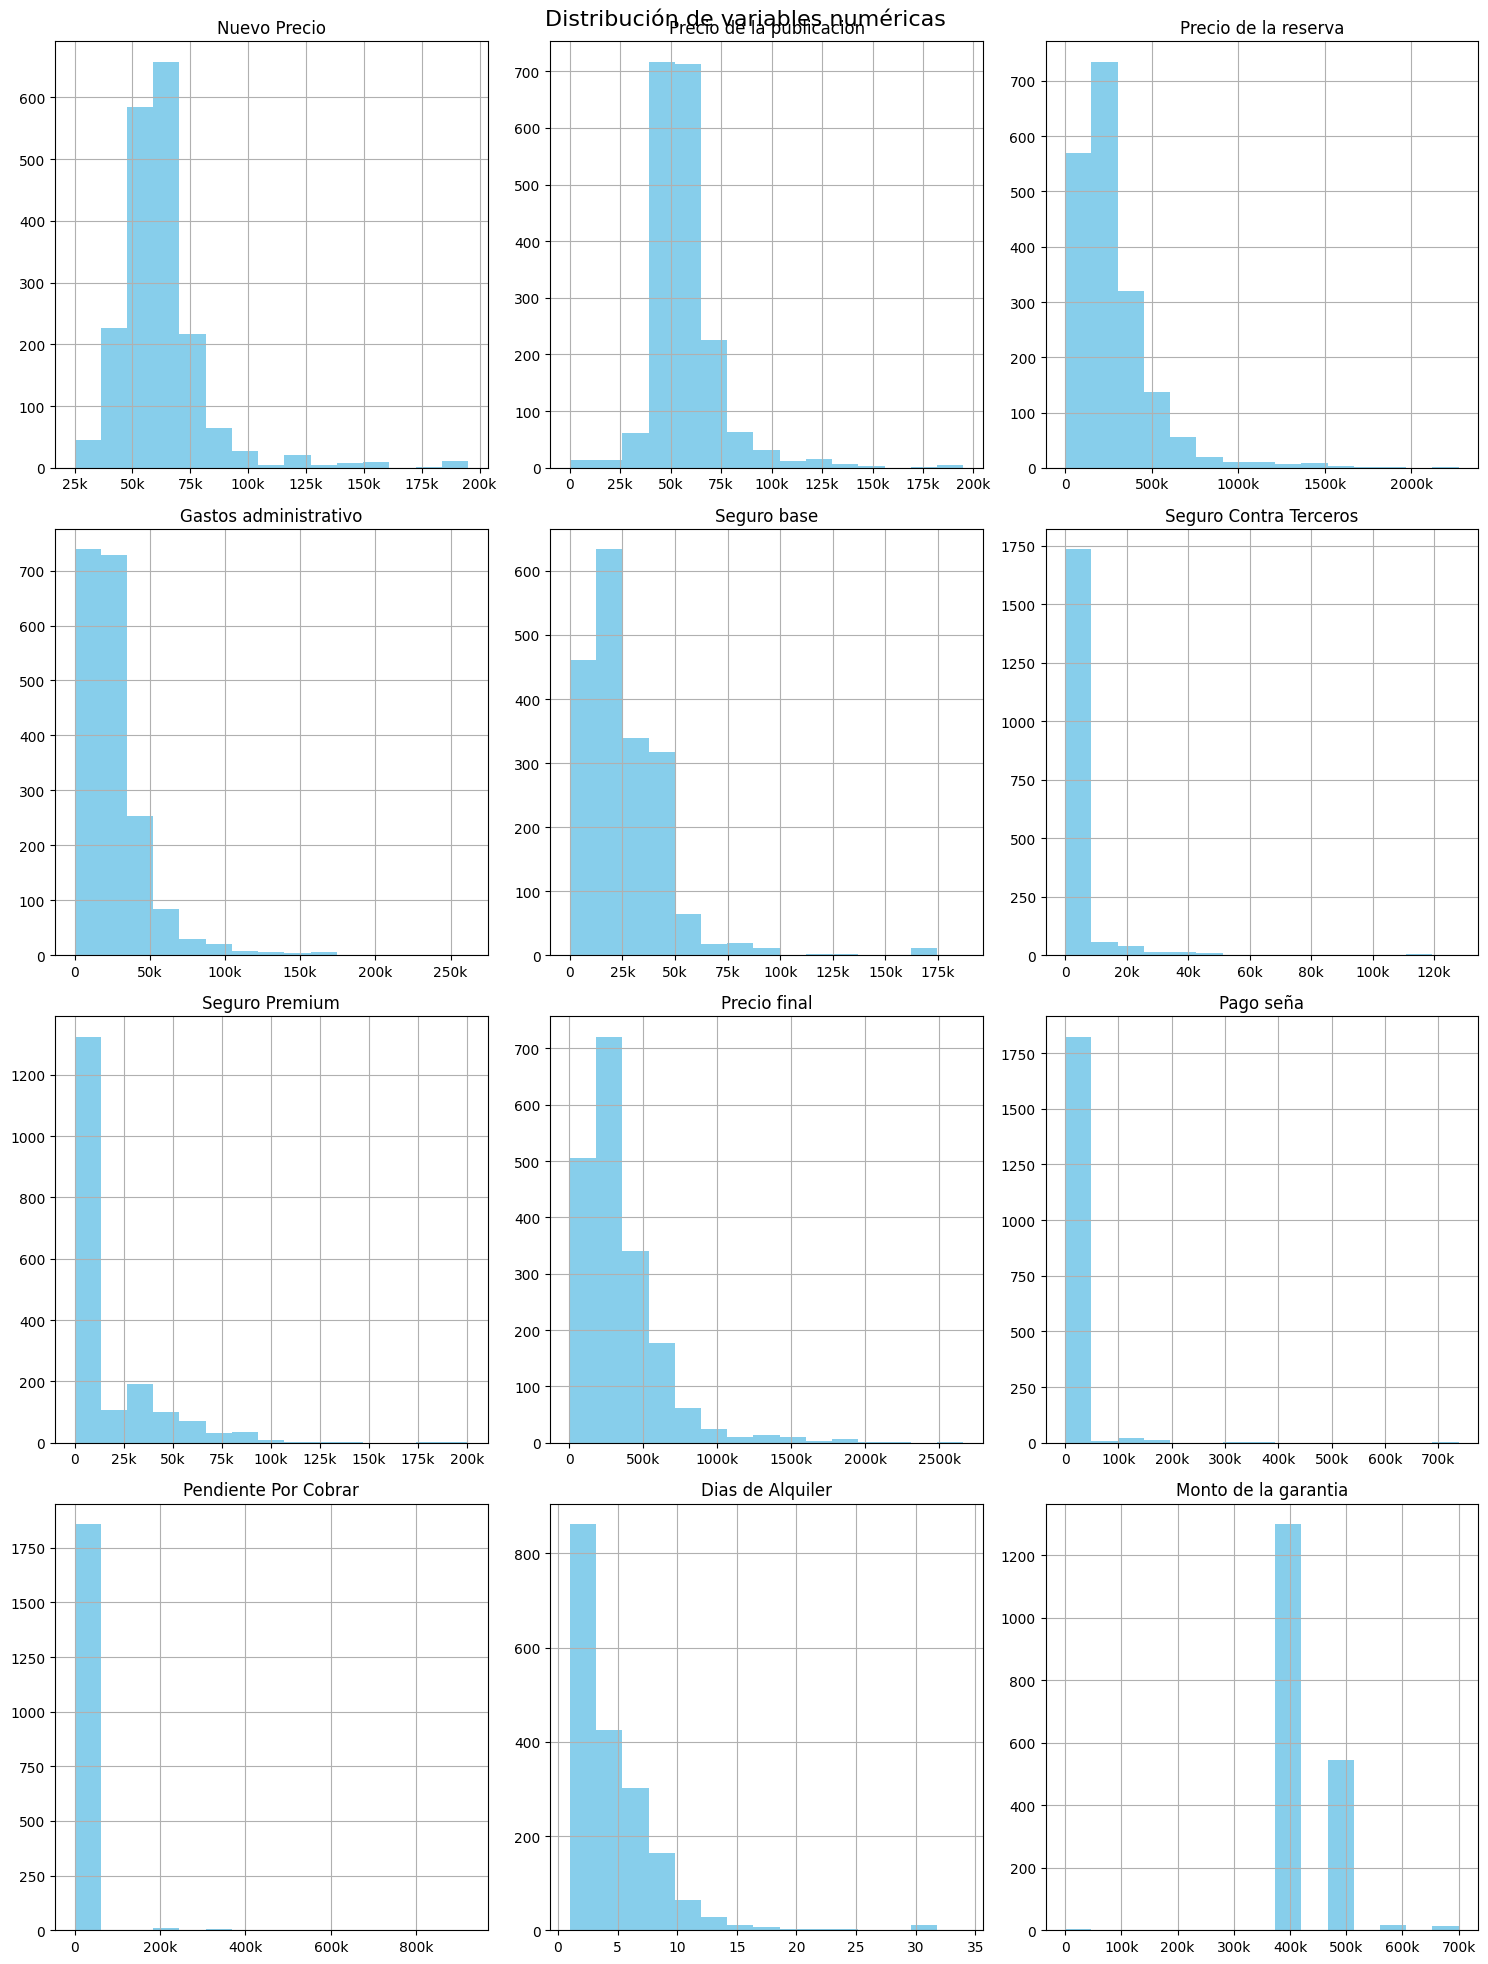

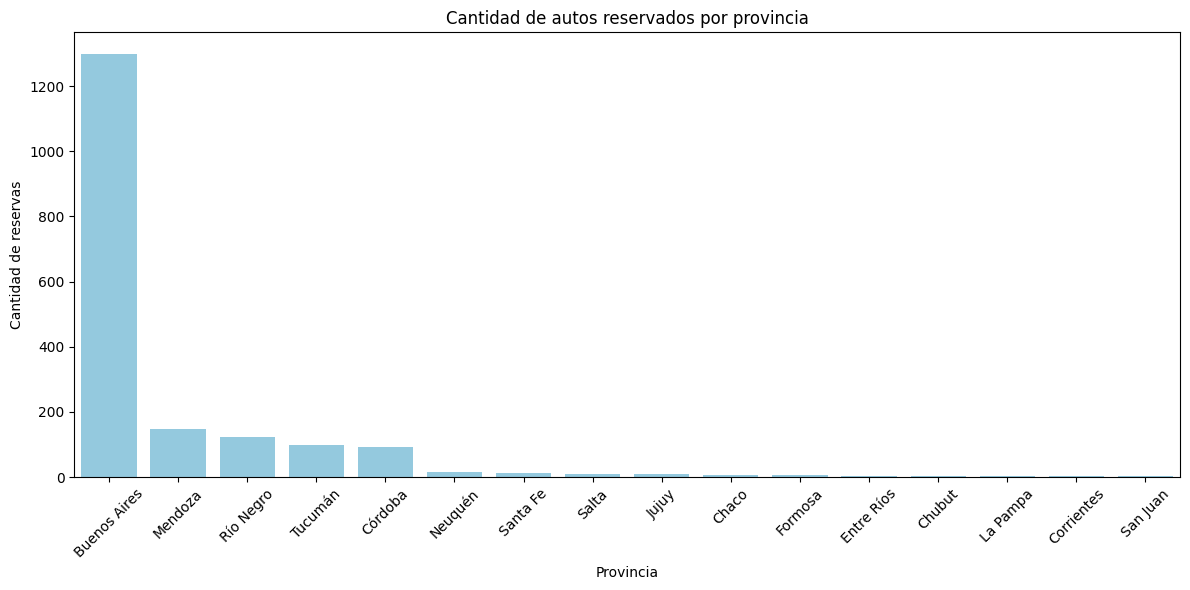

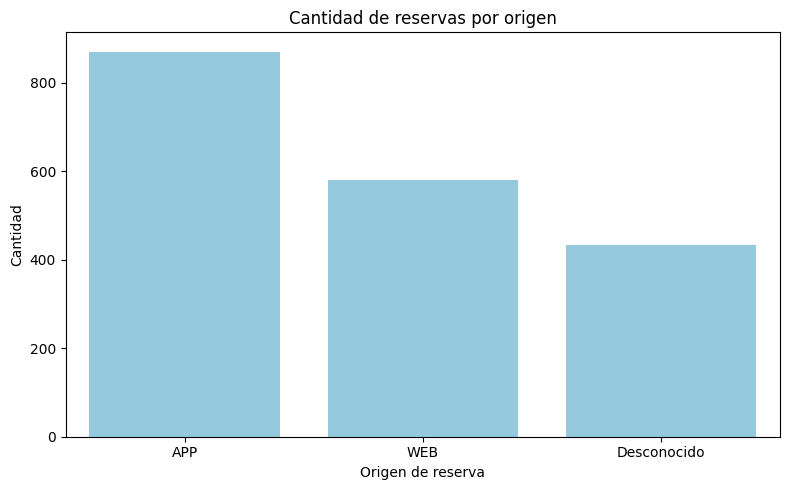

In [60]:
# Distribuciones de variables
df_filtered = pd.read_csv('dataset/Reservas_limpio.csv', sep=';')

numeric_columns = df_filtered.select_dtypes(include='number').columns

n = len(numeric_columns)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    df_filtered[column].hist(bins=15, ax=axes[i], color='skyblue')
    axes[i].set_title(column)
    axes[i].xaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}k' if x >= 1000 else int(x))
    )
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distribución de variables numéricas', fontsize=16)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
sns.barplot(x=conteo_provincias.index, y=conteo_provincias.values, color='skyblue')
plt.xticks(rotation=45)
plt.title("Cantidad de autos reservados por provincia")
plt.xlabel("Provincia")
plt.ylabel("Cantidad de reservas")
plt.tight_layout()
plt.show()

df_filtered['Origen'] = df_filtered['Origen'].fillna('Desconocido')
df_filtered['Origen'] = df_filtered['Origen'].replace('', 'Desconocido')
conteo_origen = df_filtered['Origen'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=conteo_origen.index, y=conteo_origen.values, color='skyblue')
plt.title('Cantidad de reservas por origen')
plt.xlabel('Origen de reserva')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

#### 🧊 Detección de outliers con boxplots

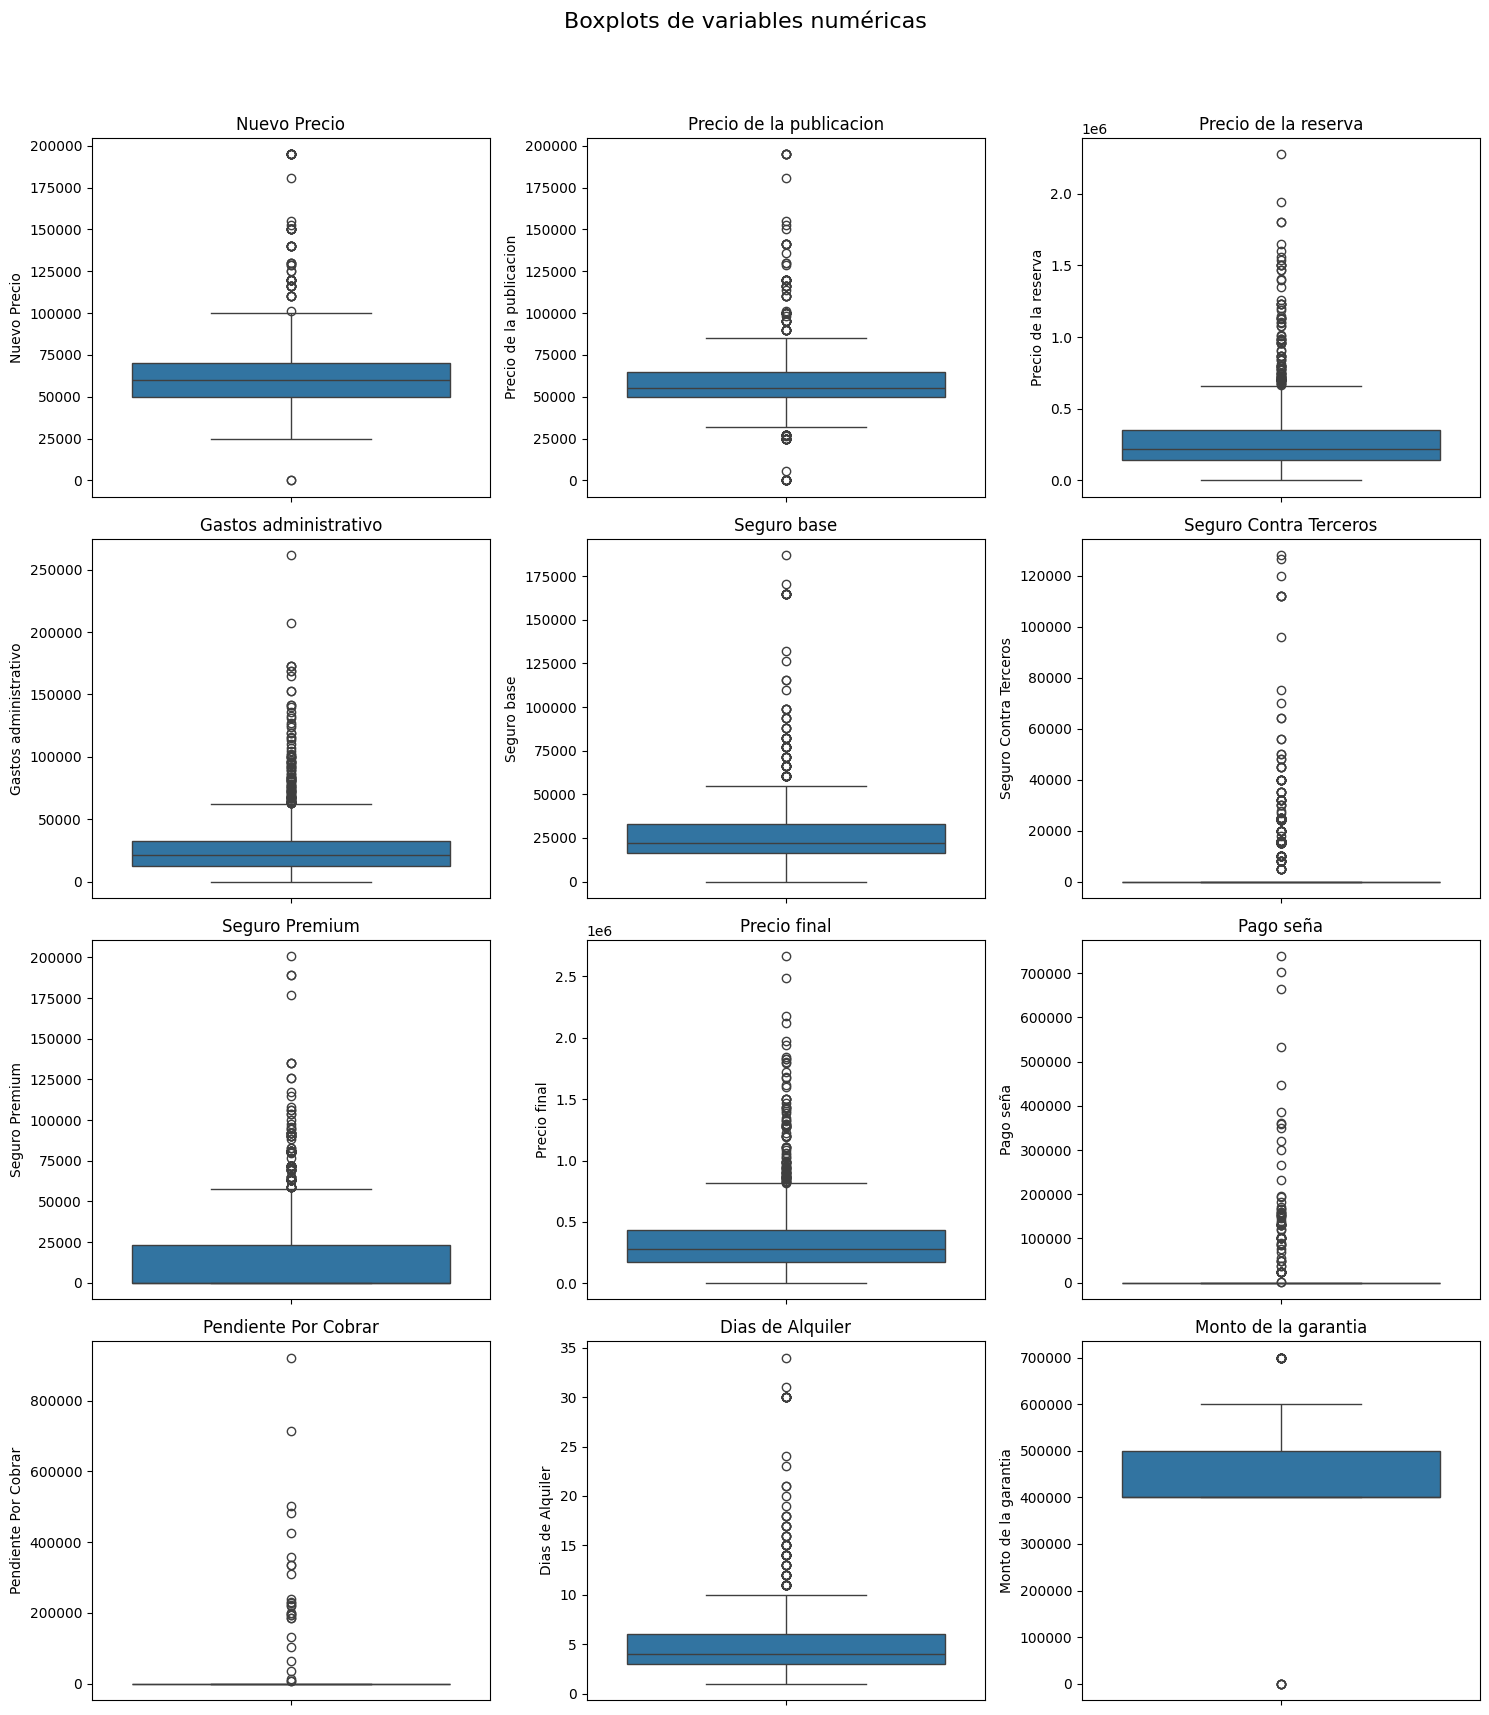

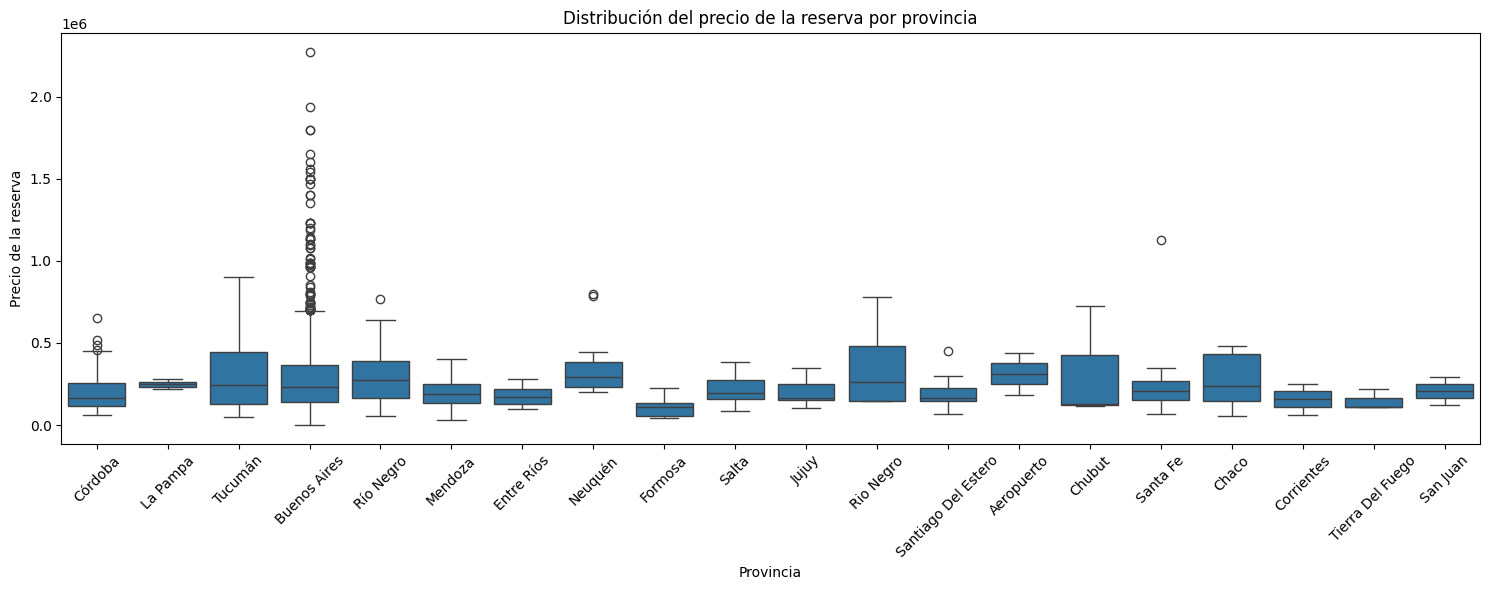

In [ ]:
# Boxplots verticales de las 12 variables numéricas (3 por fila)
fig, axes = plt.subplots(4, 3, figsize=(15, 18))

columnas = df_filtered.select_dtypes(include='number').columns

for i, ax in enumerate(axes.flat):
    sns.boxplot(y=df_filtered[columnas[i]], ax=ax)
    ax.set_title(columnas[i])

plt.suptitle('Boxplots de variables numéricas', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


plt.figure(figsize=(15, 6))
sns.boxplot(x='Provincia', y='Precio de la reserva', data=df_filtered)
plt.xticks(rotation=45)
plt.title('Distribución del precio de la reserva por provincia')
plt.tight_layout()
plt.show()

#### 🔗 Matriz de correlación entre variables numéricas

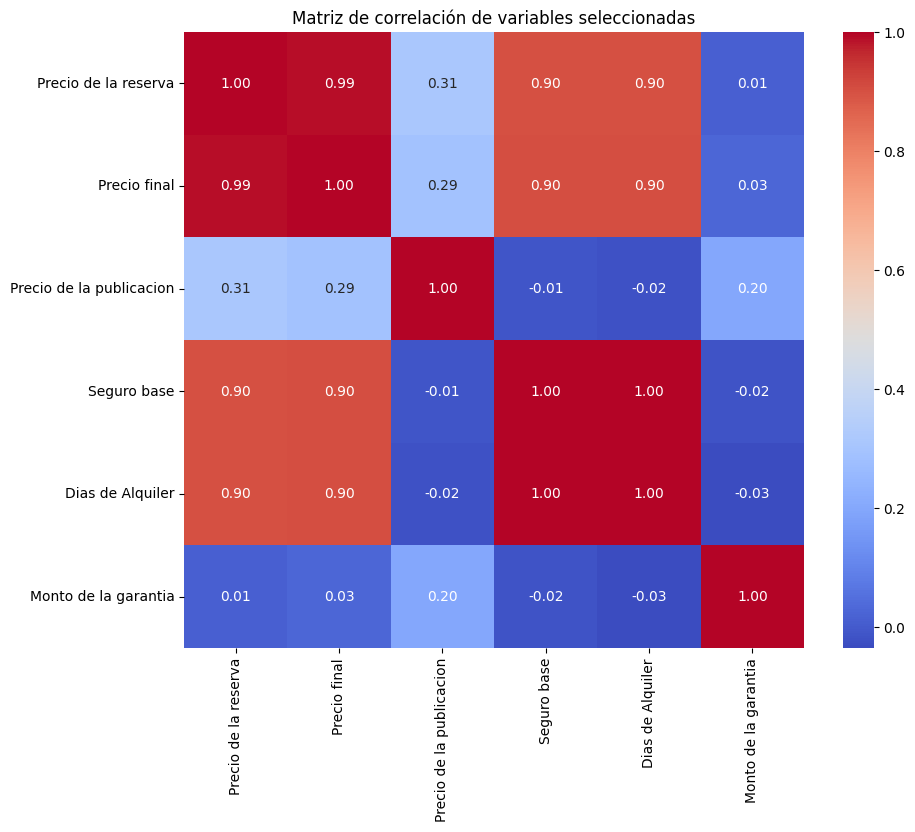

In [ ]:
numericas = df_filtered.select_dtypes(include='number')
variancia = numericas.var()
columnas_validas = variancia[variancia > 0].index

columnas_correlacion = [
    'Precio de la reserva',
    'Precio final',
    'Precio de la publicacion',
    'Seguro base',
    'Seguro Contra Tercero',
    'Dias de Alquiler',
    'Monto de la garantia'
]

columnas_correlacion = [col for col in columnas_correlacion if col in numericas.columns]

plt.figure(figsize=(10, 8))
sns.heatmap(numericas[columnas_correlacion].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación de variables seleccionadas")
plt.show()

#### 📊 Relación entre variables: ejemplo alcohol vs quality

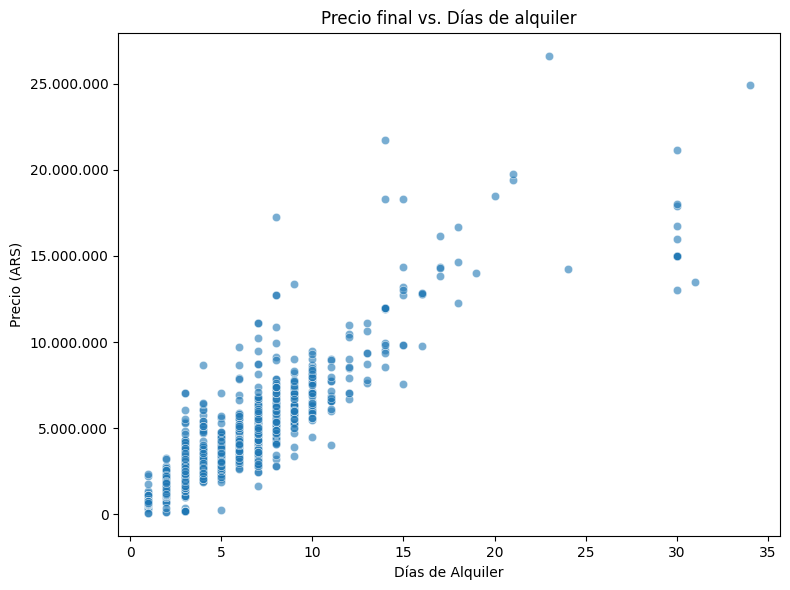

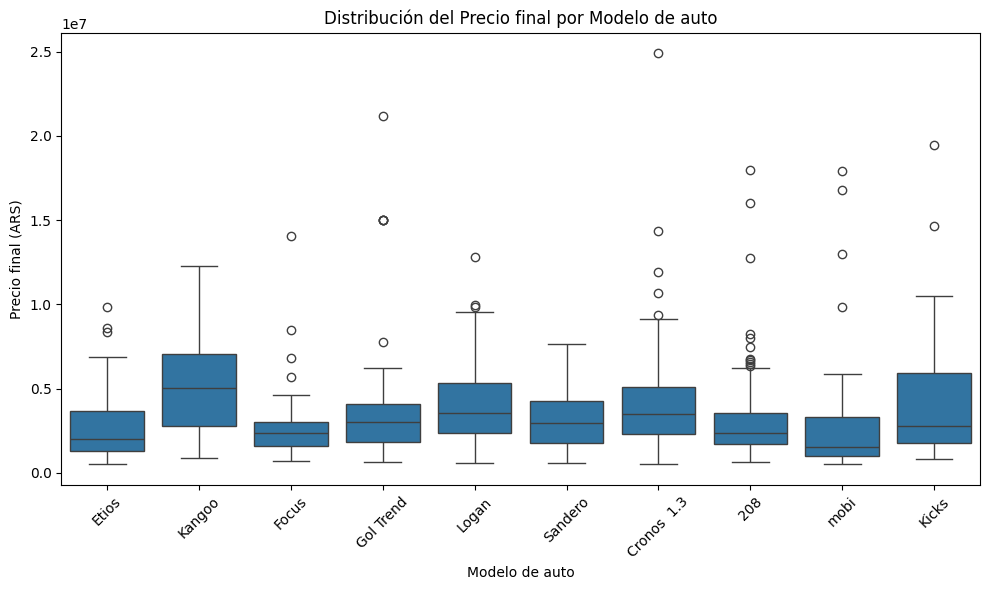

In [ ]:
#sns.boxplot(x='quality', y='alcohol', data=df)
#plt.title('Distribución del alcohol según calidad del vino')
#plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_filtered,
    x='Dias de Alquiler',
    y='Precio final',
    alpha=0.6
)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))
plt.title('Precio final vs. Días de alquiler')
plt.xlabel('Días de Alquiler')
plt.ylabel('Precio (ARS)')
plt.tight_layout()
plt.show()



top_modelos = df_filtered['Modelo'].value_counts().nlargest(10).index
df_modelos = df_filtered[df_filtered['Modelo'].isin(top_modelos)]

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_modelos,
    x='Modelo',
    y='Precio final'
)
plt.xticks(rotation=45)
plt.title('Distribución del Precio final por Modelo de auto')
plt.ylabel('Precio final (ARS)')
plt.xlabel('Modelo de auto')
plt.tight_layout()
plt.show()

### 🧼 4. Diagnóstico de calidad de datos
- No se detectaron valores faltantes.
- Algunas variables muestran asimetrías (ej: `residual sugar`, `chlorides`).
- Existen valores atípicos en varias variables.
- Se observa una posible relación positiva entre alcohol y calidad.

### 🧪 5. Transformaciones realizadas

In [ ]:
# Crear variable categórica basada en calidad
df['quality_label'] = df['quality'].apply(lambda x: 'low' if x <= 4 else 'medium' if x <= 6 else 'high')
df['quality_label'] = pd.Categorical(df['quality_label'], categories=['low', 'medium', 'high'])

In [ ]:
# Normalización de variables numéricas (excepto quality)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = df.select_dtypes(include='number').columns.drop('quality')
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,5,medium
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,5,medium
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,5,medium
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,6,medium
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,5,medium


### ✍️ 6. Reflexión final

Completar
